**Import the Module (Pandas, numpy , matplotlib,seaborn)**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Read CSV**


In [81]:
df = pd.read_csv("quikr_car.csv")
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


**Chech the Null Values**


In [82]:
df.isnull().sum()

,0
name,0
company,0
year,0
Price,0
kms_driven,52
fuel_type,55


**Check DataTypes**

In [83]:
df.dtypes

,0
name,object
company,object
year,object
Price,object
kms_driven,object
fuel_type,object


**Drop Column kms_driven**


In [84]:
df = df.drop(columns="kms_driven")

**Fill  the Null Values in column 'fuel_type'**


In [85]:
df['fuel_type'] = df['fuel_type'].fillna(method='ffill')

/tmp/ipython-input-401870940.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



**Mixed data in year column to split the column in number and white space to convert null values and fill the  Null  values  with the help of method='ffill'**
  

In [86]:
df['year']=df['year'].str.replace( r'\D'  ,'', regex=True)

df['year'] = df['year'].replace(r'^\s*$', np.nan, regex=True)
df['year'] = df['year'].fillna(method='ffill')

/tmp/ipython-input-2111609780.py:4: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



**year column in wrong year like (150, 40 ,230 etc ) to convert 2002 after change the datatype year column to date   use the format= '%y'**

In [87]:
df['year'] = df['year'].astype(int)
df.loc[~df['year'].between(1900, 2100), 'year'] = 2002
df['year'] = pd.to_datetime(df['year'], format='%Y')
df['year'] = df['year'].dt.year


 **Price column mixed data to convert nmueric after then white space to convert Null value then convert null values to mean value of column**

In [88]:
df['Price'] = df['Price'].str.replace(r'\D', '', regex=True)
df['Price'] = df['Price'].replace(r'^\s*$', np.nan, regex=True)
df['Price'] = df['Price'].astype(float)
df['Price'] = df['Price'].fillna(df['Price'].mean())


 **Check the Null values**



In [89]:
df.isnull().sum()

,0
name,0
company,0
year,0
Price,0
fuel_type,0


**clean the table**


In [90]:
df

,name,company,year,Price,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.000000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000.000000,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,404688.534422,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.000000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000.000000,Diesel
...,...,...,...,...,...
887,Ta,Tara,2009,310000.000000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000.000000,Diesel
889,Mahindra Quanto C8,Mahindra,2013,390000.000000,Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,180000.000000,Diesel


**How Many sales each year**

In [91]:
salesyear = df['year'].value_counts()
salesyear

,count
year,
2015,124
2013,110
2014,96
2012,81
2016,76
2011,63
2009,58
2017,56
2010,47


/tmp/ipython-input-3680998696.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




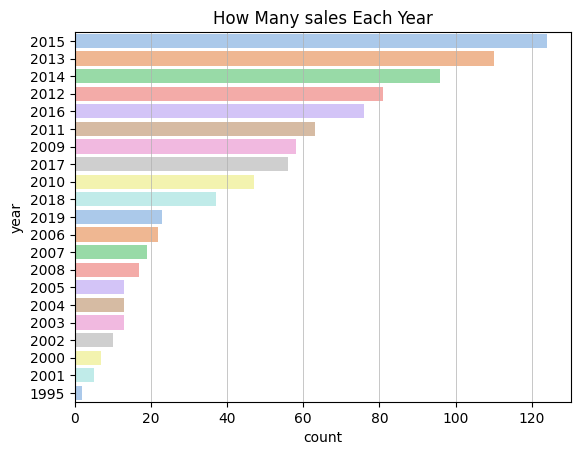

In [92]:
sorted_year = df['year'].value_counts().sort_values(ascending=False)


sns.countplot(y= df['year'], order=sorted_year.index , palette='pastel')

plt.title("How Many sales Each Year")

plt.grid(axis='x',linewidth=0.5)
plt.show()

**Find the Top 10 vehical selling**


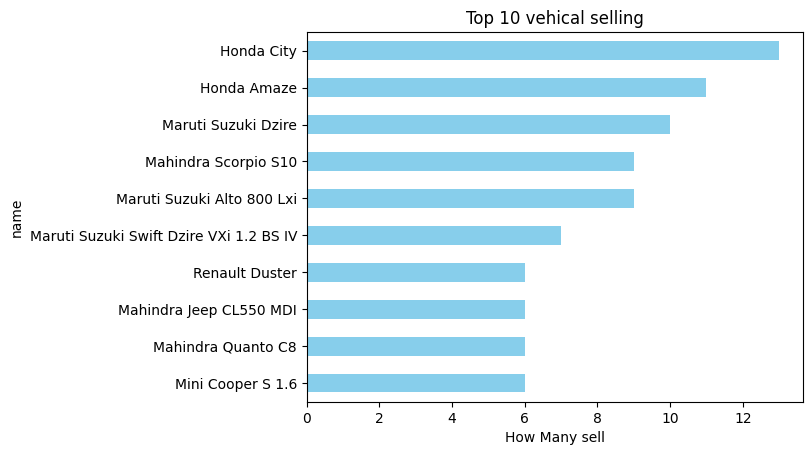

In [93]:
nlargest = df['name'].value_counts().nlargest(10).plot(kind='barh',color='skyblue')
plt.xlabel("How Many sell")
plt.title("Top 10 vehical selling")

plt.gca().invert_yaxis()   # Highest value at top
plt.show()

**Count of Vehicle by Company**

In [94]:
count_company = df['company'].value_counts()
count_company

,count
company,
Maruti,235
Hyundai,145
Mahindra,100
Tata,74
Honda,61
Toyota,39
Chevrolet,35
Renault,34
Ford,31


**Count of vehicale by Company**

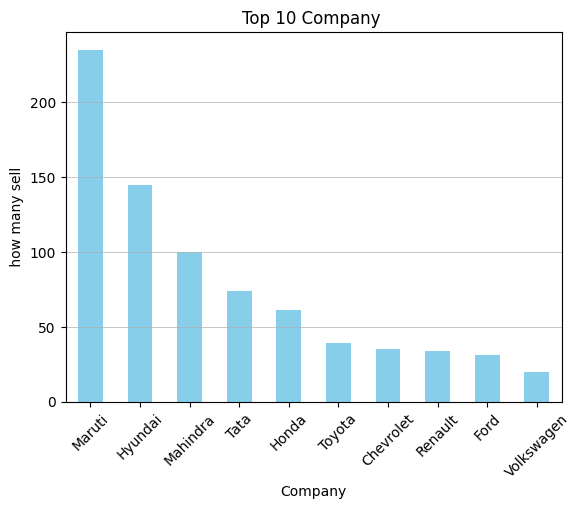

In [95]:
countcompany= df['company'].value_counts().nlargest(10).plot(kind='bar',color='skyblue')
plt.title("Top 10 Company ")
plt.xlabel("Company")
plt.ylabel(" how many sell ")
plt.grid(axis='y',linewidth=0.5)
plt.xticks(rotation=45)
plt.show()


**Count of cars by Fuel Type**


/tmp/ipython-input-3136818836.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




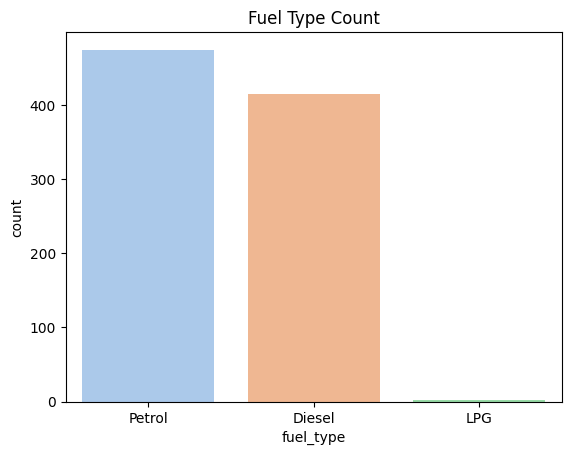

In [96]:
sns.countplot(x=df['fuel_type'],palette='pastel')
plt.title("Fuel Type Count")
plt.show()

**Top 10 Expencive vehical Amount**

In [97]:
large_Amount = df['Price'].nlargest(10)
large_Amount


,Price
562,8500003.0
719,3100000.0
838,2900000.0
510,2800000.0
668,2390000.0
667,2190000.0
232,2100000.0
231,2000000.0
678,1900000.0
73,1891111.0


**Top 10 expencive vehical**


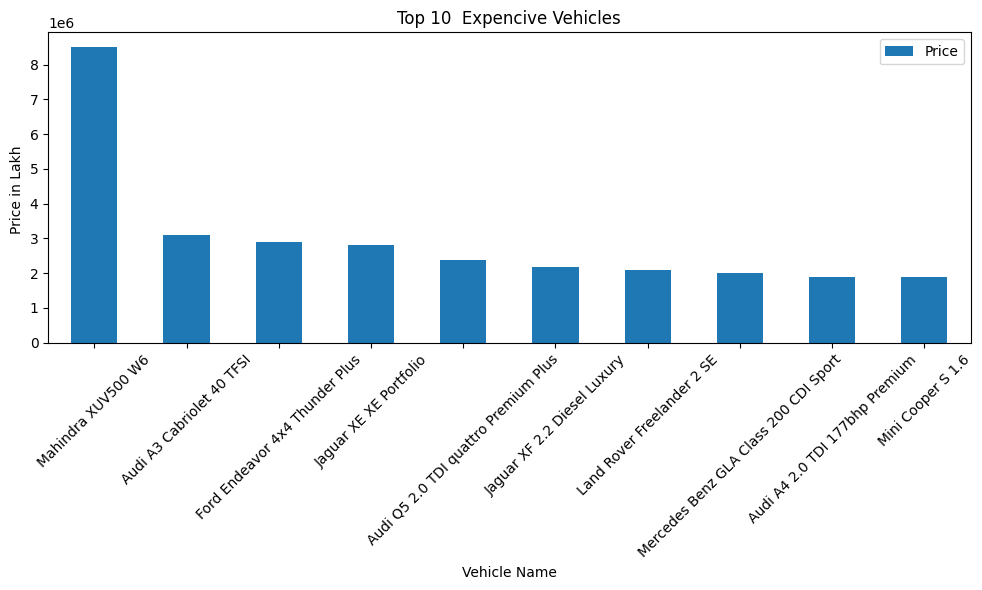

In [98]:
top_vehicle_name = df.nlargest(10,'Price')[['name','Price']]

top_vehicle_name.plot( x='name',    y='Price',    kind='bar', figsize=(10,6) )

plt.title("Top 10  Expencive Vehicles")
plt.xlabel("Vehicle Name")
plt.ylabel("Price in Lakh ")
plt.xticks(rotation=45)   # names readable
plt.tight_layout()
plt.show()


**Price distribution**

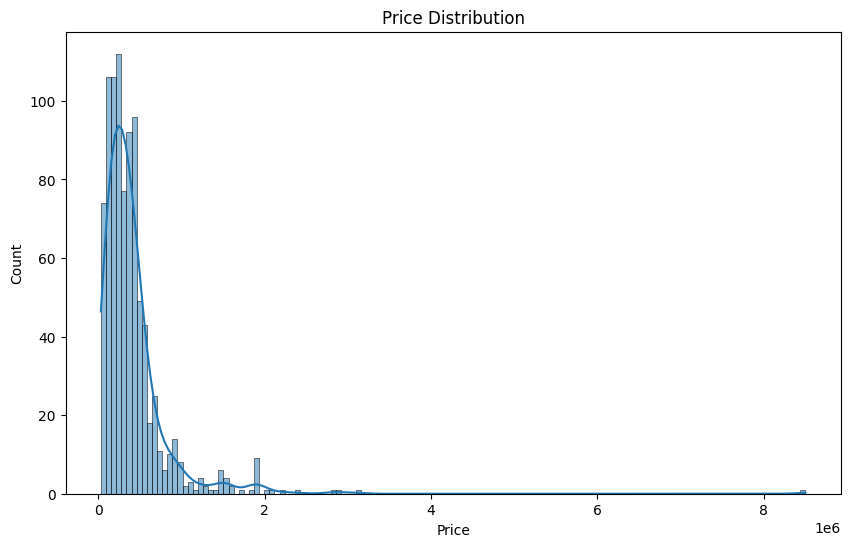

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()


**Price by Company**

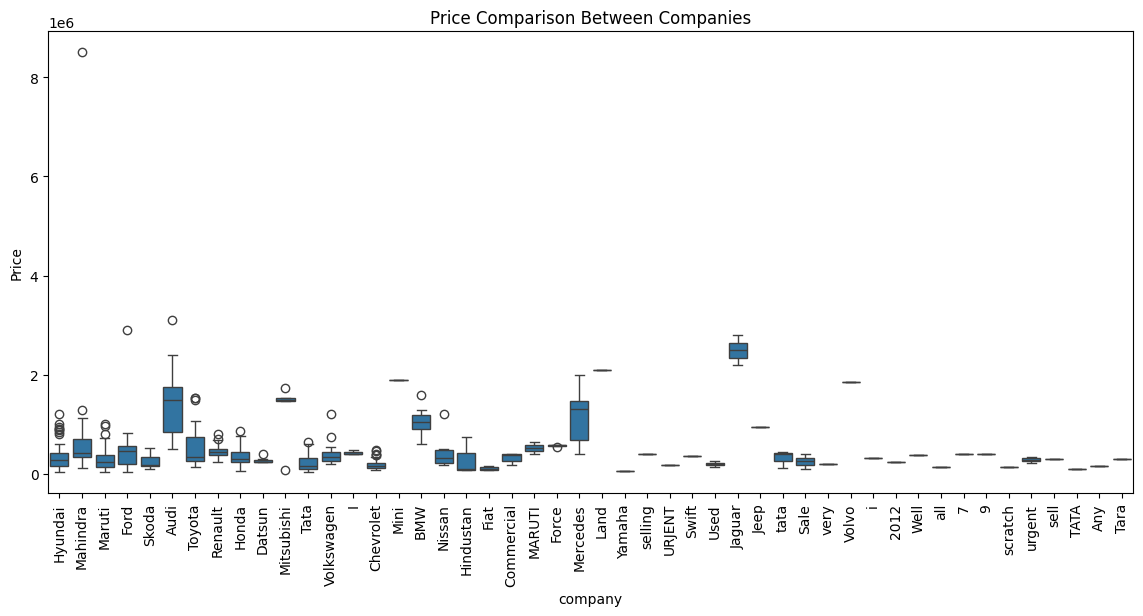

In [100]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='company', y='Price')
plt.xticks(rotation=90)
plt.title("Price Comparison Between Companies")
plt.show()


In [101]:
df

,name,company,year,Price,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.000000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000.000000,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,404688.534422,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.000000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000.000000,Diesel
...,...,...,...,...,...
887,Ta,Tara,2009,310000.000000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000.000000,Diesel
889,Mahindra Quanto C8,Mahindra,2013,390000.000000,Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,180000.000000,Diesel


**Find top 10 Company by Total price**


In [102]:
groupby_company = df.groupby('company')['Price'].sum().nlargest(10)
groupby_company = groupby_company.apply(lambda x: format(x, '.0f'))
groupby_company

,Price
company,
Maruti,64716607
Mahindra,59891485
Hyundai,46686118
Honda,21037975
Toyota,19964371
Audi,16246000
Tata,15839808
Renault,15601594
Mini,15128888


**Fuel Type Distribution of Year**

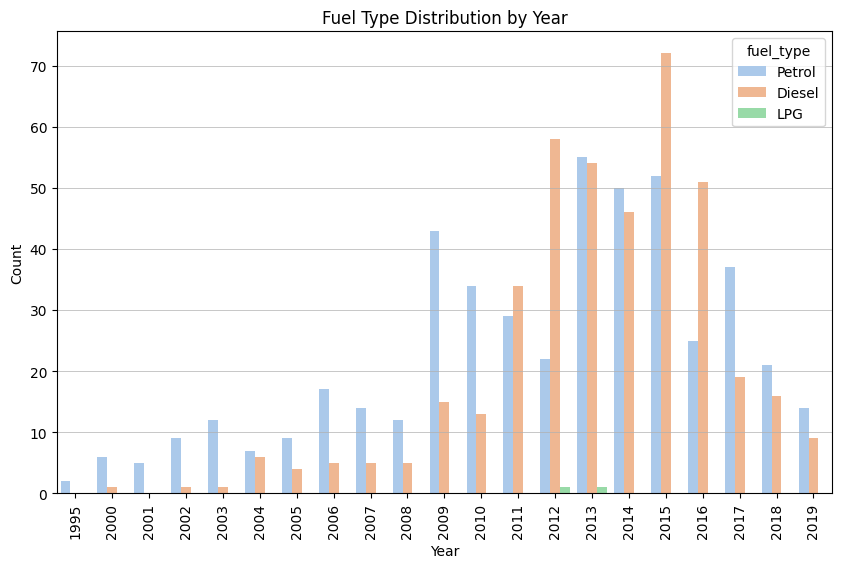

In [103]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='year',hue='fuel_type',  palette='pastel')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Fuel Type Distribution by Year')
plt.xticks(rotation=90)
plt.grid(axis='y',linewidth=0.5)
plt.show()


**Fuel Type Count Per Year**

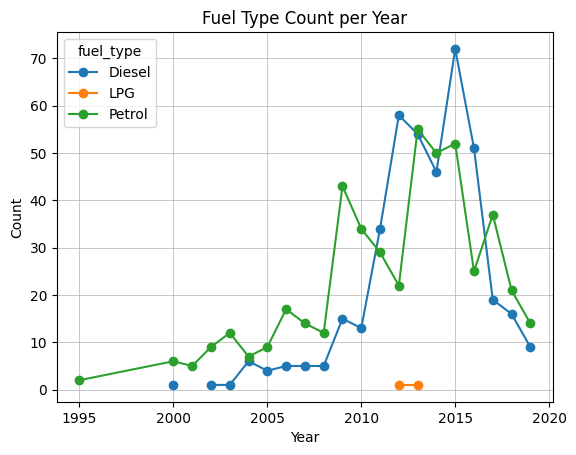

In [104]:
fuel_counts = df.groupby(['year', 'fuel_type']).size().unstack()

fuel_counts.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Fuel Type Count per Year')
plt.grid(True,linewidth=0.5)
plt.show()


**Average Price per Company**

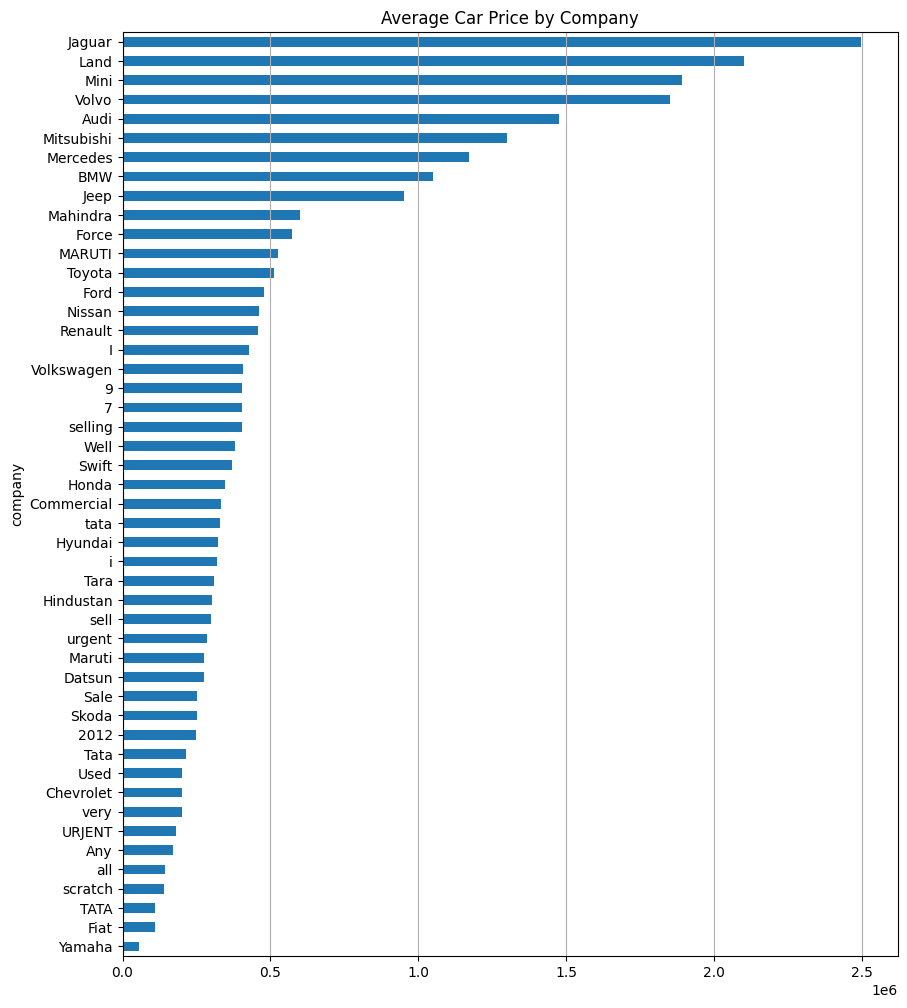

In [105]:
plt.figure(figsize=(10, 12))
df.groupby('company')['Price'].mean().sort_values().plot(kind='barh')
plt.title("Average Car Price by Company")
plt.grid(axis='x')
plt.show()


**Average Price per Fuel Type**

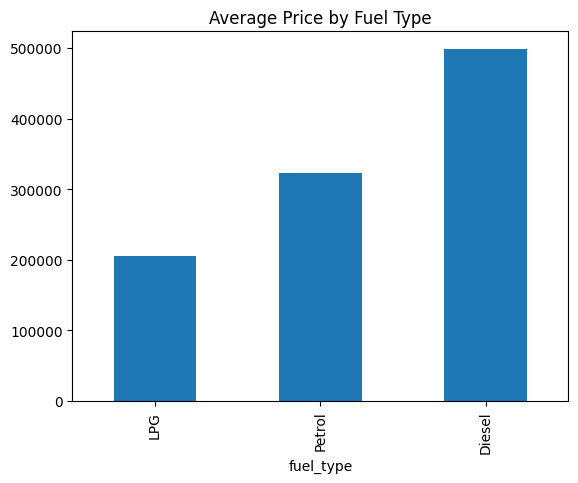

In [106]:
df.groupby('fuel_type')['Price'].mean().sort_values().plot(kind='bar')
plt.title("Average Price by Fuel Type")
plt.show()


**Total Sales (Price Sum) per Company**

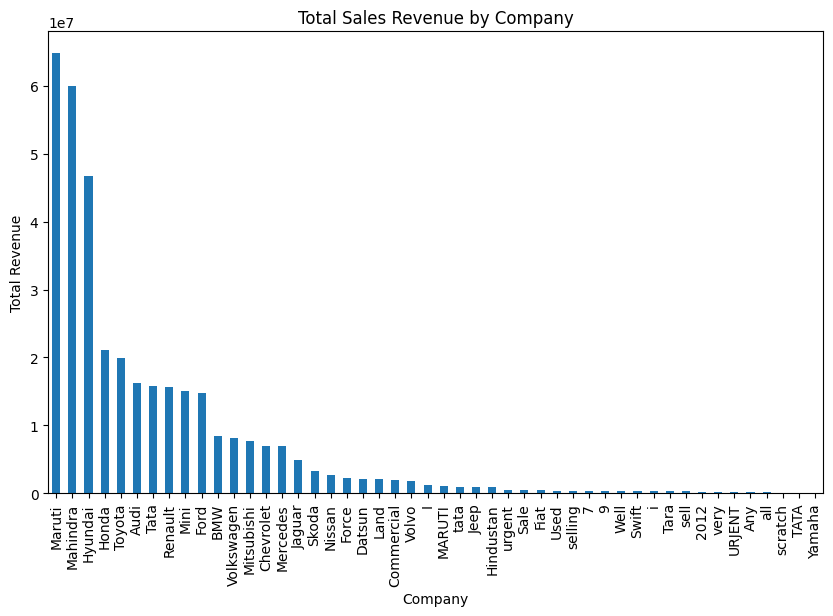

In [107]:
plt.figure(figsize=(10, 6))
df.groupby('company')['Price'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Total Sales Revenue by Company")
plt.xlabel("Company")
plt.ylabel("Total Revenue")

plt.show()


**Price Trend by Year**

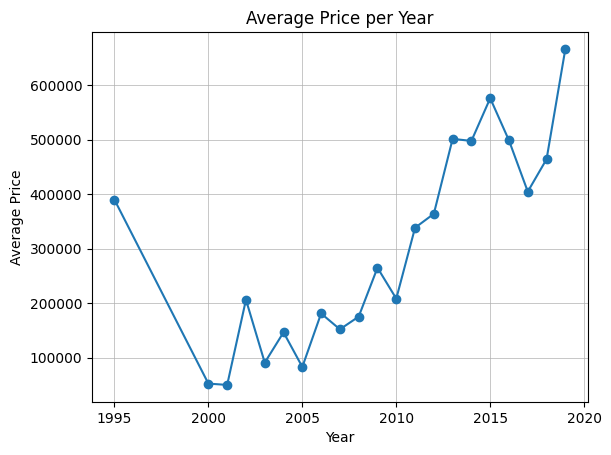

In [108]:
df.groupby('year')['Price'].mean().plot(marker='o')
plt.title("Average Price per Year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.grid(True,linewidth=0.5)
plt.show()


**Company vs Fuel Type**

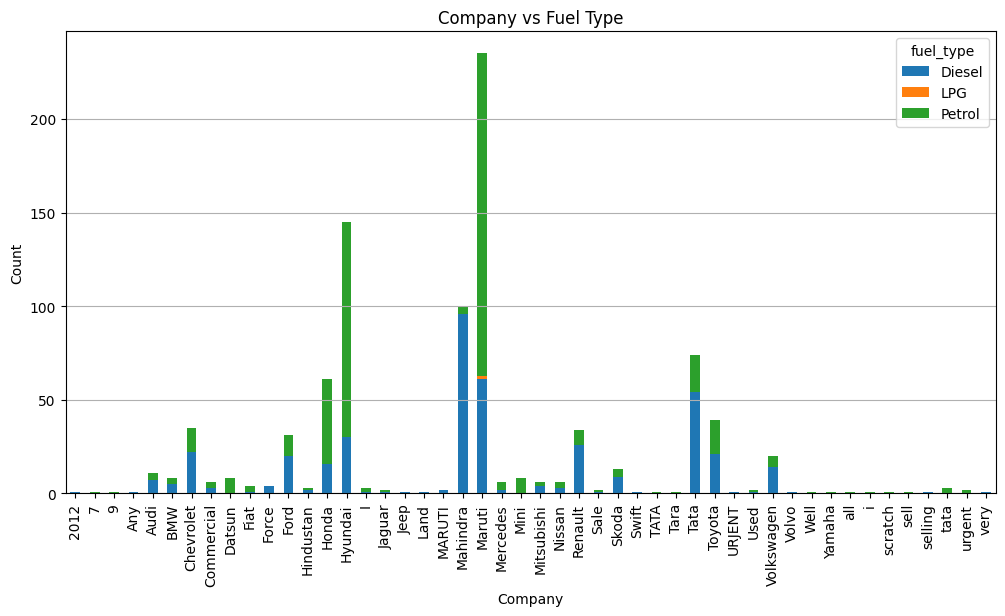

In [109]:
pd.crosstab(df['company'], df['fuel_type']).plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Company vs Fuel Type")
plt.xlabel("Company")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()


**Pie Chart : Fuel Type Distribution**

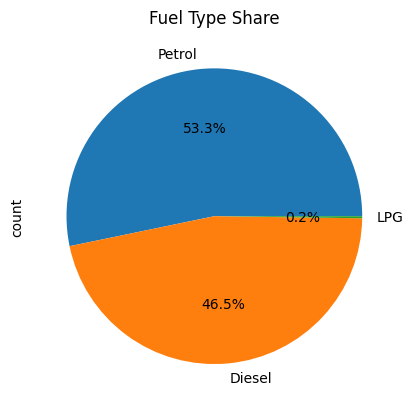

In [110]:
df['fuel_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Fuel Type Share")
plt.show()
